In [2]:
import pickle as pkl
path = './results_deepsvg_format/'
file = open(path+'/Curve_embedding_lookup_tabledebug/true_by_name.pkl', 'rb')
true_by_name = pkl.load(file)
file.close()
file = open(path+'/Curve_embedding_lookup_tabledebug/pred_by_name.pkl', 'rb')
pred_by_name = pkl.load(file)
file.close()


In [3]:
import os
os.chdir("../deepsvg_own_data")
from deepsvg.svglib.geom import Point
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.svg_path import SVGPath
from deepsvg.svglib.utils import to_gif

from deepsvg.difflib.tensor import SVGTensor
from deepsvg.difflib.utils import *
from deepsvg.difflib.loss import *
from deepsvg.svglib.geom import Bbox

In [4]:
from deepsvg.gui.utils import preprocess_svg_path

In [5]:
true_path = SVGPath.from_tensor(torch.tensor(pred_by_name['BioRhymeExpanded-ExtraLight_066_B_1269_1000-11-B']))
svg = SVG([true_path]).normalize()

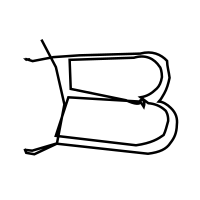

In [6]:
svg.draw()


In [7]:
SVG([true_path])[0].path

SVGPath(M[P(0.0, 0.0), P(3.6227169036865234, 7.1219329833984375)] L[P(3.6227169036865234, 7.1219329833984375), P(3.1440601348876953, 7.136402606964111)] L[P(3.2629852294921875, 7.235778331756592), P(3.2454071044921875, 7.227705478668213)] L[P(3.00168514251709, 7.223002910614014), P(3.0342464447021484, 7.062344551086426)] L[P(3.0051164627075195, 7.046621799468994), P(3.9179420471191406, 7.333432674407959)] L[P(4.188851356506348, 6.89877462387085), P(6.416740417480469, 6.854983806610107)] L[P(6.596254825592041, 6.874093055725098), P(9.499448776245117, 6.6420769691467285)] L[P(8.371177673339844, 6.902401924133301), P(16.823152542114258, 6.433248043060303)] C[P(16.632099151611328, 5.930826663970947), P(18.242944717407227, 6.0470499992370605), P(19.31817054748535, 6.526579856872559), P(20.042612075805664, 7.2988715171813965)] C[P(19.642290115356445, 7.4315385818481445), P(20.062503814697266, 8.003656387329102), P(20.271223068237305, 8.6407470703125), P(20.34951400756836, 9.336650848388672)]

In [8]:
from chamferdist import ChamferDistance as ChamferDistance
chamferDist = ChamferDistance()
count = 0
loss_paths = []
for k in list(true_by_name.keys()):
    #print(k)
    
    true_path = SVGPath.from_tensor(torch.tensor(true_by_name[k]))
    
    pred_path = SVGPath.from_tensor(torch.tensor(pred_by_name[k]))
    SVGPath
    for i in range(min(len(true_path),len(pred_path))):
        t = torch.tensor(true_path[i].sample_points()).unsqueeze(0).float()
        p = torch.tensor(pred_path[i].sample_points()).unsqueeze(0).float()
        dist_bidirectional = chamferDist(t,p, bidirectional=True)
        loss = dist_bidirectional.detach().cpu().item()
        
        #loss = (torch.mean(dist1)) + (torch.mean(dist2))
        loss_paths.append(loss)
        #torch.cuda.synchronize()
    # if count <10:
    #     count+=1
    # else:
    #     break
    
    
    

In [13]:
loss_paths = np.array(loss_paths)
loss_paths[loss_paths<100].mean()

32.278194929884414

In [11]:
loss_paths[:100]

[43.26333999633789,
 50.06571578979492,
 21.298725128173828,
 42.05219650268555,
 67.34965515136719,
 1399.647705078125,
 19.141563415527344,
 31.56182098388672,
 2.0284836292266846,
 48.886566162109375,
 13.696175575256348,
 48.20958709716797,
 16.938335418701172,
 20.403371810913086,
 55.053672790527344,
 27.10657501220703,
 46.90480041503906,
 40.815765380859375,
 97.0837631225586,
 54.474952697753906,
 29.838592529296875,
 30.62864112854004,
 9.387727737426758,
 53.00623321533203,
 64.595703125,
 68.7042007446289,
 45.35298538208008,
 46.09919738769531,
 6.393874168395996,
 16.76258087158203,
 32.20185089111328,
 14.820683479309082,
 68.81221008300781,
 11.336761474609375,
 31918.97265625,
 38069.48828125,
 18.114248275756836,
 26.98633575439453,
 15.010367393493652,
 37.67559814453125,
 46.30729675292969,
 8.073089599609375,
 49.70719909667969,
 9.61824893951416,
 22.026809692382812,
 38.19597625732422,
 27.766727447509766,
 29.891407012939453,
 26.964019775390625,
 30.57255363464

In [8]:
list(pred_by_name.keys())[:10]

['Barlow-Thin_076_L_566_1000-21-L',
 'Poly-Italic_081_Q_671_1000-26-Q',
 'Syne[wght]_110_n_554_1000-49-n',
 'BioRhymeExpanded-ExtraLight_066_B_1269_1000-11-B',
 'EkMukta-Bold_056_eight_520_1000-8-8',
 'DoHyeon-Regular_048_zero_550_1000-0-0',
 'Teko-Bold_119_w_679_1000-58-w',
 'Suwannaphum-Thin_116_t_719_2048-55-t',
 'AsapVFBeta_107_k_521_1000-46-k',
 'VesperLibre-Regular_083_S_1060_2048-28-S']

In [10]:
pred_by_name['Barlow-Thin_076_L_566_1000-21-L']

array([[ 0.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       ,  0.       ,  0.       , -0.       , -0.       ,
        -0.       , -0.       ,  6.7201138,  3.3940554],
       [ 1.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       ,  6.9470663,  3.6058517,  0.       ,  0.       ,
         0.       ,  0.       ,  7.01056  ,  3.4711063],
       [ 2.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       ,  6.8396215,  3.420426 ,  6.862522 ,  3.279752 ,
         6.9442196,  3.2212684,  6.988139 ,  3.1680684],
       [ 2.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       ,  6.837188 ,  3.1737132,  6.922393 ,  3.100187 ,
         7.0170217,  3.0351124,  7.0582666,  2.9928715],
       [ 1.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       ,  7.033644 ,  2.932614 ,  0.       ,  0.       ,
         0.       ,  0.       ,  7.248349 ,  3.0170197],
       [ 1.       , -1.       , -1.